In [2]:
%matplotlib inline
import numpy as np
import torch
import torch.optim as optim

torch.set_printoptions(edgeitems=2, linewidth=75)

In [3]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1) # <1>
t_u = torch.tensor(t_u).unsqueeze(1) # <1>

t_u.shape

torch.Size([11, 1])

In [4]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices

(tensor([9, 7, 3, 5, 4, 1, 2, 0, 8]), tensor([ 6, 10]))

In [5]:
t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]

t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]

t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val

In [6]:
import torch.nn as nn

linear_model = nn.Linear(1, 1)
linear_model(t_un_val)

tensor([[2.2498],
        [4.8148]], grad_fn=<AddmmBackward0>)

In [7]:
linear_model.weight

Parameter containing:
tensor([[0.7435]], requires_grad=True)

In [8]:
linear_model.bias

Parameter containing:
tensor([-0.2706], requires_grad=True)

In [9]:
x = torch.ones(1)
linear_model(x)

tensor([0.4729], grad_fn=<ViewBackward0>)

In [10]:
x = torch.ones(10, 1)
linear_model(x)

tensor([[0.4729],
        [0.4729],
        [0.4729],
        [0.4729],
        [0.4729],
        [0.4729],
        [0.4729],
        [0.4729],
        [0.4729],
        [0.4729]], grad_fn=<AddmmBackward0>)

In [11]:
lienar_model = nn.Linear(1, 1)
optimizer = optim.SGD(
    linear_model.parameters(),
    lr=1e-2
)

In [12]:
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val, t_c_train, t_c_val):
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(t_u_train)
        loss_train = loss_fn(t_p_train, t_c_train)

        t_p_val = model(t_u_val)
        loss_val = loss_fn(t_p_val, t_c_val)

        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()

        if epoch == 1 or epoch % 1000 == 0:
            print(f"Epoch {epoch}, Training Loss {loss_train.item():.4f}."
                  f" Validation loss {loss_val.item():.4f}")

In [13]:
linear_model = nn.Linear(1, 1)
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

training_loop(
    n_epochs=3000,
    optimizer=optimizer,
    model=linear_model,
    loss_fn=nn.MSELoss(),
    t_u_train= t_un_train,
    t_u_val= t_un_val,
    t_c_train= t_c_train,
    t_c_val= t_c_val
)

print()
print(linear_model.weight)
print(linear_model.bias)

Epoch 1, Training Loss 176.0743. Validation loss 221.7225
Epoch 1000, Training Loss 3.6660. Validation loss 4.2329
Epoch 2000, Training Loss 2.6671. Validation loss 4.8542
Epoch 3000, Training Loss 2.6293. Validation loss 5.1646

Parameter containing:
tensor([[5.3974]], requires_grad=True)
Parameter containing:
tensor([-17.8591], requires_grad=True)


In [17]:
seq_model = nn.Sequential(
    nn.Linear(1, 13),
    nn.Tanh(),
    nn.Linear(13, 1)
)

seq_model

Sequential(
  (0): Linear(in_features=1, out_features=13, bias=True)
  (1): Tanh()
  (2): Linear(in_features=13, out_features=1, bias=True)
)

In [20]:
[param.shape for param in seq_model.parameters()]

[torch.Size([13, 1]), torch.Size([13]), torch.Size([1, 13]), torch.Size([1])]

In [32]:
from collections import OrderedDict

seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, 10)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(10, 1))
]))

seq_model

Sequential(
  (hidden_linear): Linear(in_features=1, out_features=10, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=10, out_features=1, bias=True)
)

In [33]:
optimizer = optim.SGD(seq_model.parameters(), lr=1e-3)

training_loop(
    n_epochs= 5000,
    optimizer= optimizer,
    model = seq_model,
    loss_fn= nn.MSELoss(),
    t_u_train= t_un_train,
    t_u_val= t_un_val,
    t_c_train= t_c_train,
    t_c_val= t_c_val
)

print(f"output {seq_model(t_un_val)}")
print(f"answer {t_c_val}")
print(f"hidden {seq_model.hidden_linear.weight.grad}")

Epoch 1, Training Loss 187.8565. Validation loss 235.2966
Epoch 1000, Training Loss 4.4403. Validation loss 6.3906
Epoch 2000, Training Loss 3.1905. Validation loss 3.9775
Epoch 3000, Training Loss 1.7401. Validation loss 4.3976
Epoch 4000, Training Loss 1.5876. Validation loss 4.6517
Epoch 5000, Training Loss 1.5603. Validation loss 4.8089
output tensor([[-0.0859],
        [20.6909]], grad_fn=<AddmmBackward0>)
answer tensor([[ 3.],
        [21.]])
hidden tensor([[-0.0066],
        [ 0.0033],
        [ 0.0050],
        [-0.0030],
        [ 0.0033],
        [ 0.0093],
        [ 0.0060],
        [-0.0277],
        [-0.0036],
        [-0.0258]])


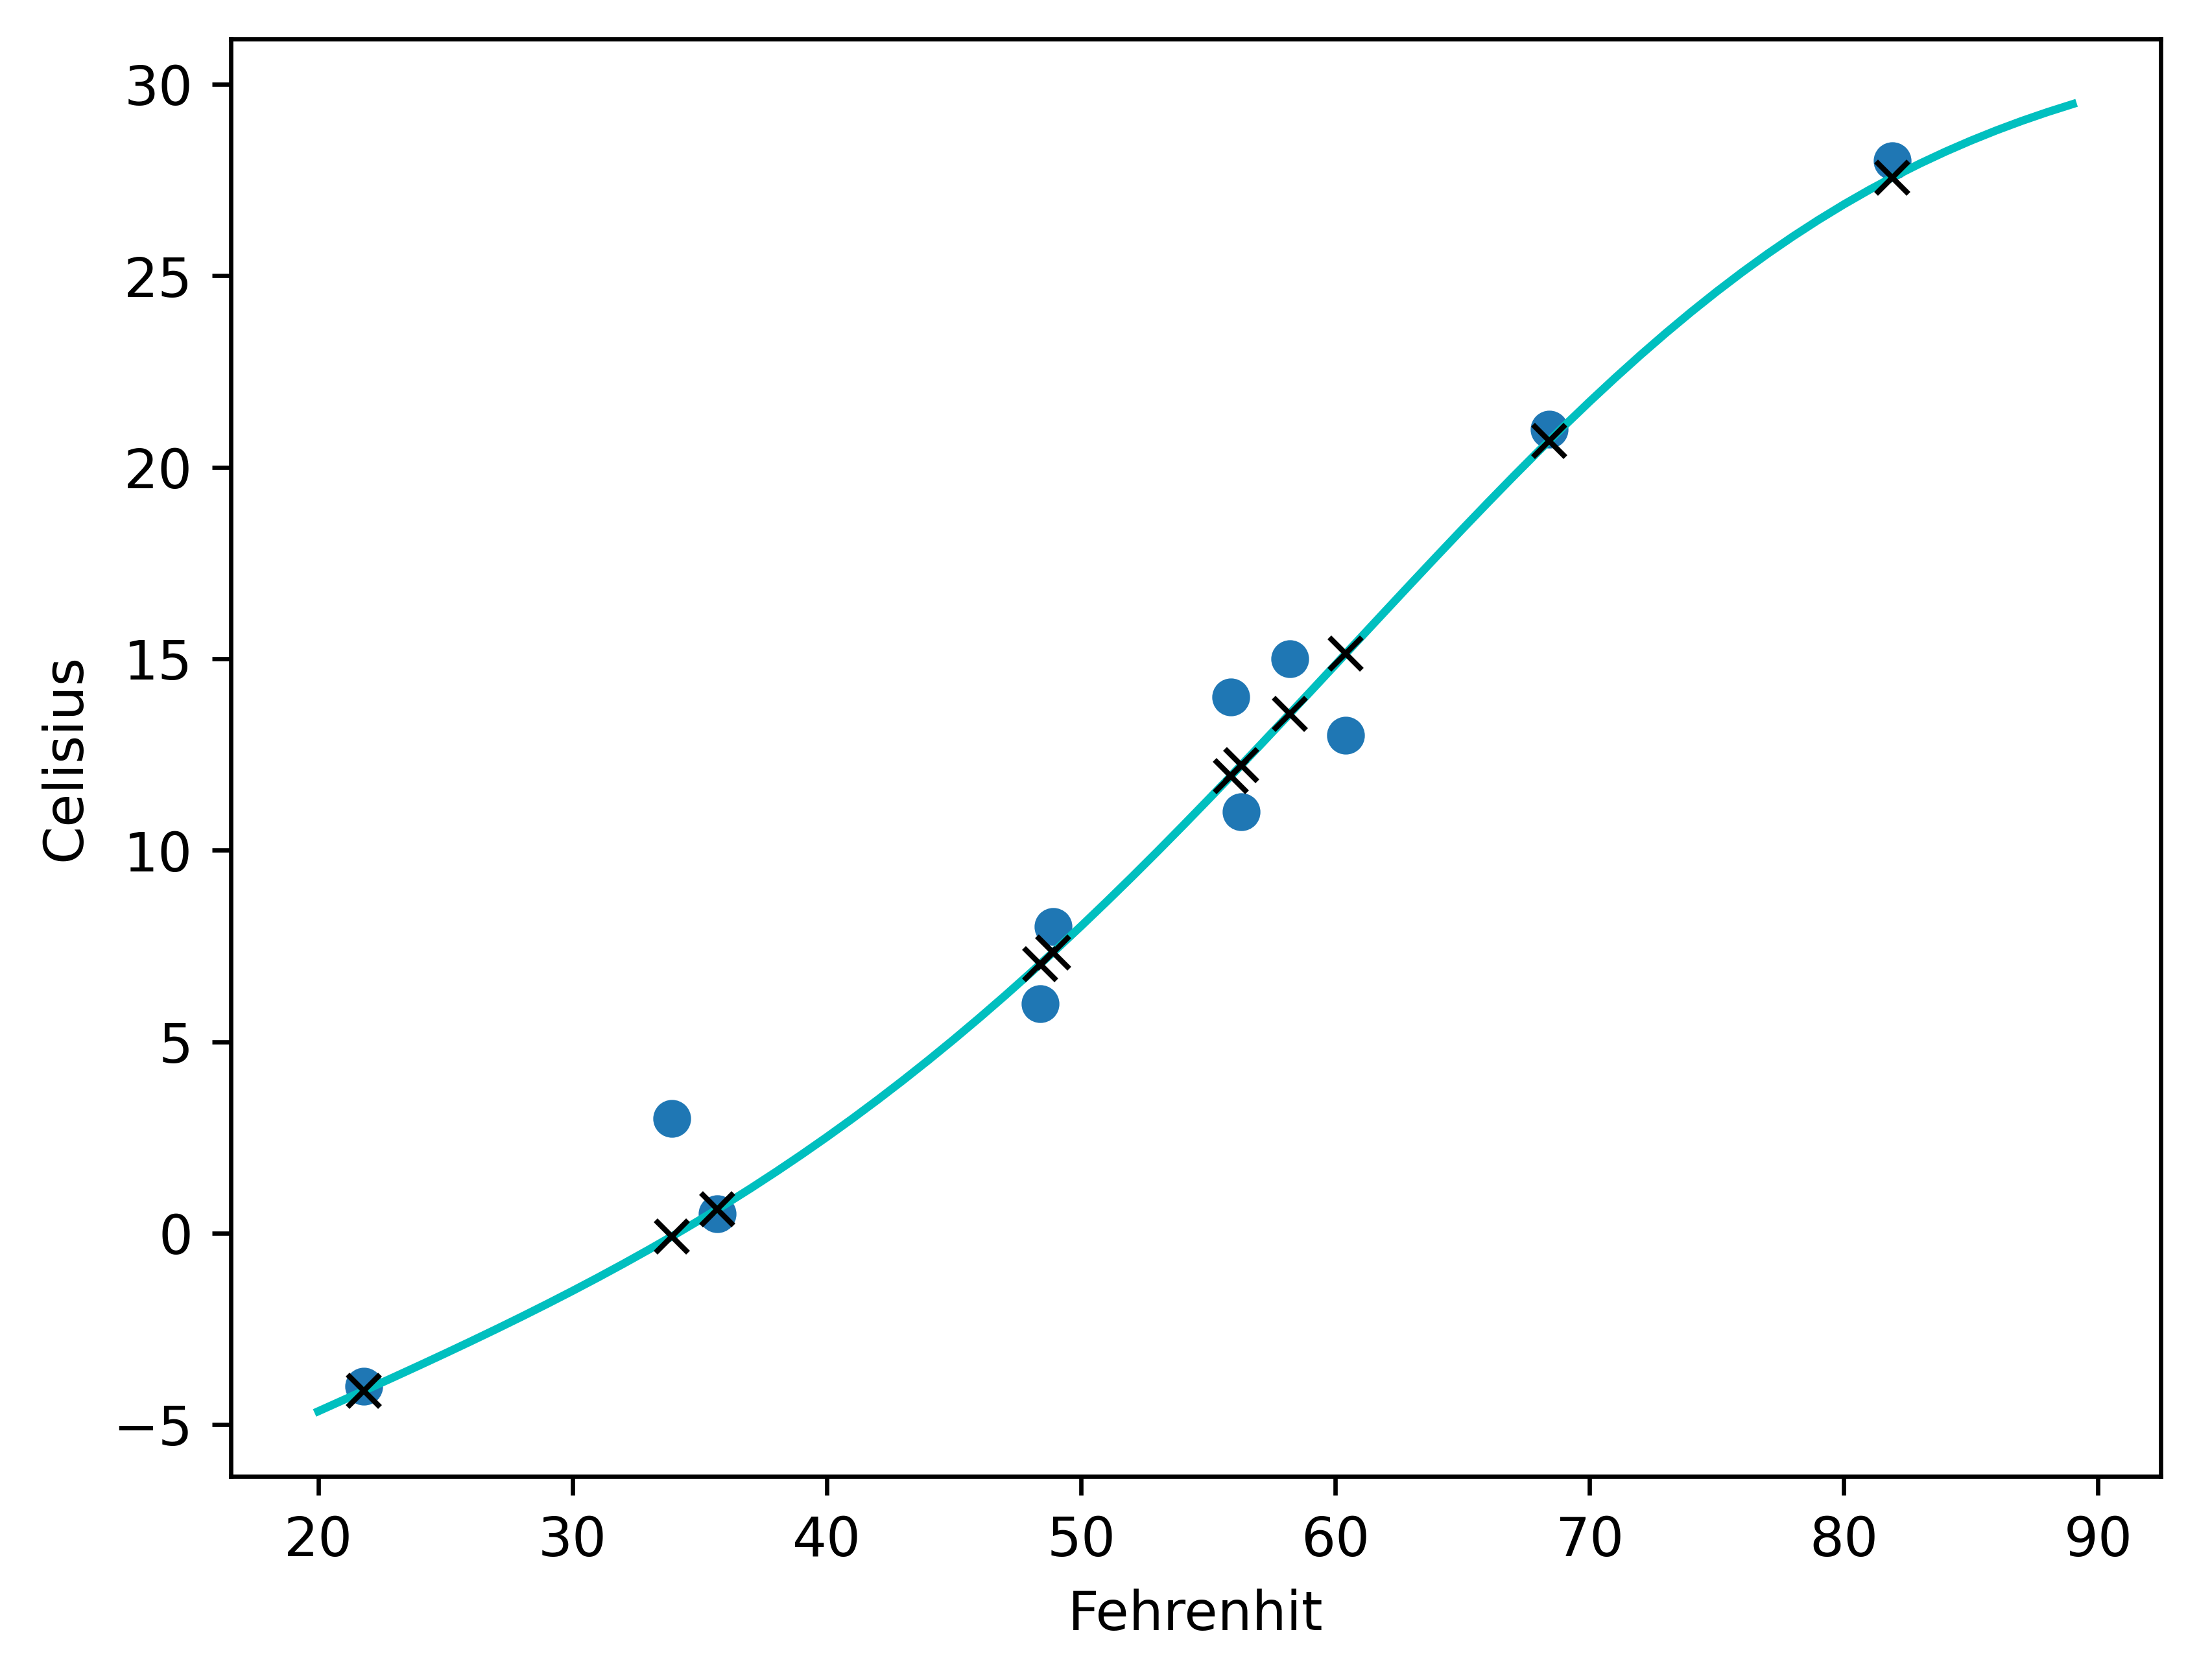

In [34]:
from matplotlib import pyplot as plt

t_range = torch.arange(20.0, 90.0).unsqueeze(1)

fig = plt.figure(dpi=600)
plt.xlabel("Fehrenhit")
plt.ylabel("Celisius")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')